<a href="https://colab.research.google.com/github/omardrho/SA_Bdarija/blob/main/pi_preprocessed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTEBOOK SETUP**

In [ ]:
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyarabic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from operator import length_hint 
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
import copy
from torch import nn, optim
from torch.utils import data
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel

In [ ]:
import codecs

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
pip install aaransia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from aaransia import transliterate 


In [ ]:
import string
import re
from pyarabic.araby import strip_tatweel,strip_tashkeel

**DATA EXPLORATION**

In [ ]:
df= pd.read_csv('/content/dataset_darija_1.csv', on_bad_lines='skip', sep = ';')
df.columns = ['sentiment','sentence']
df['sentiment'] = df['sentiment'].str.strip()
df.head(30)


,sentiment,sentence
0,pos,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكو...
1,pos,هاذي بلاد الشرفاء و بلاد رجال لي دافعو على أر...
2,pos,كل التوفيق بدر هاري ولد الشعب راك عزيز
3,pos,كاتعجبني هاد أغنية 😎😎😎
4,pos,يتبرع باموال باهضة للفقراء فخر المغرب
5,pos,و أنتم كذلك عيدكم مبارك سعيد و كل عام و أنتم ب...
6,pos,بالتوفيق ان شاء لله تعالى ( راك مرضي ) انت الأ...
7,pos,بالتوفيق ان شاء لله 🙏 ☝ راه حنا معاك بقلبنا و ...
8,pos,منتوج رائع و ثمن مناسب ....جميل
9,pos,كلنا بن كيران لي متافق معايا يدير جيم


Text(0.5, 0, 'sentiment')

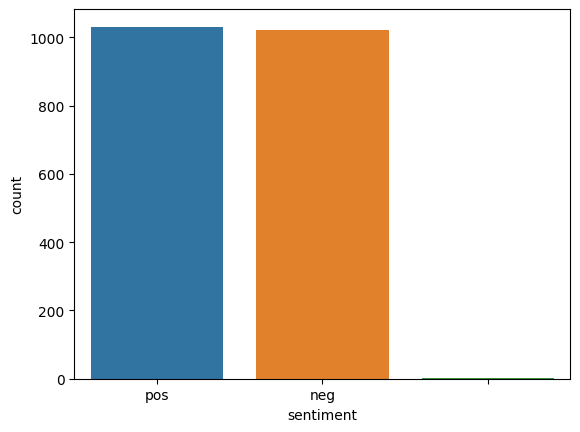

In [ ]:
sns.countplot(df, x='sentiment')
plt.xlabel('sentiment')

**PREPROCESSING**

In [ ]:

DarijaBERT_tokenizer = AutoTokenizer.from_pretrained("SI2M-Lab/DarijaBERT")
DarijaBert_model = AutoModel.from_pretrained("SI2M-Lab/DarijaBERT")

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


Some weights of the model checkpoint at SI2M-Lab/DarijaBERT were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def repted(text):
    text=re.sub(r'(.)\1+', r'\1', text)# Replace with only one (remove repetitions)  
    return text

In [ ]:
def get_emojis():
    with codecs.open("emoji.txt", "r", encoding="utf-8", errors="ignore") as myfile:
         positive_emoji=myfile.read()
    positive_emoji=positive_emoji.split("\r\n")
    positive_emoji=positive_emoji[1:len(positive_emoji)-1] 
    with codecs.open("neg_emoji.txt", "r", encoding="utf-8", errors="ignore") as myfie:
        neg_emoji=myfie.read()
    neg_emoji=neg_emoji.split("\r\n")
    neg_emoji=neg_emoji[1:len(neg_emoji)-1]
    return positive_emoji,neg_emoji

In [ ]:
def emoji_to_text(text):
    text_words = []
    words = text.split(" ")
    positive_emoji,neg_emoji=get_emojis()
    for word in words:
        if emoji_pattern.search(word):
            if word in positive_emoji :
                word='ايجابي'
            if word in neg_emoji :
                word='سلبي'
        text_words.append(word)
    return ' '.join(text_words)

In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')
    return text

In [ ]:
def pre_processing(df,source,field):
    df[field] = df[source]
    df[field] = strip_links(df[field]) # remove links
    df[field] = emoji_to_text(df[field]) # replace emojies with their sentiments
    df[field] = df[field].replace(r'@[^\s]+', 'USER', regex=True) # Replace user mentions with USER string
    df[field] = df[field].replace(r'#[^\s]+', 'HASHTAG', regex=True) # Replace Hashtags with HASHTAG string
    df=df[df[field].apply(lambda x:len(re.findall(r'[\u0600-\u06FF]+', x)))>1] #Keep sequences with at least 2 arabic words
    df[field] = df[field].apply(strip_tatweel) #Remove Tatweel string 
    df[field] = df[field].apply(strip_tashkeel) # Remove Diacritics
    df[field] = df[field].apply(repted)
    return df

In [ ]:
sample_txt= "ch7al zwina dnia"
sample_txt_ar=transliterate(sample_txt, source='ma', target='ar', universal=True)
tokens = DarijaBERT_tokenizer.tokenize(sample_txt_ar)
token_ids = DarijaBERT_tokenizer.convert_tokens_to_ids(tokens)
print(f' Sentence: {sample_txt_ar}')
print(f'   Tokens: {tokens}')
print(f'Tokens: {token_ids}')

 Sentence: شحال زوينا دنيا
   Tokens: ['شحال', 'زوينا', 'دنيا']
Tokens: [2448, 22504, 4236]


In [ ]:
encoding = DarijaBERT_tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)
encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


dict_keys(['input_ids', 'attention_mask'])

In [ ]:
encoding['input_ids']

tensor([[    2,  8094,  1041,  3630, 56472,    48, 19829,  1058,     3,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]])

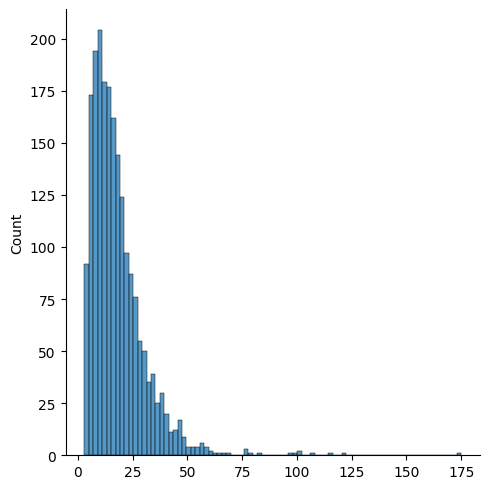

In [ ]:
token_lens=[]

for txt in df.sentence:
  encodings=DarijaBERT_tokenizer.encode(txt,max_length=512)
  var=length_hint(encodings)
  token_lens.append(var)
sns.displot(token_lens)  


**Creat a Pytorch Dataset**

In [ ]:
class GPSentenceDataset(Dataset):
  def __init__(self, sentences, targets, tokenizer, max_len):
    self.sentences = sentences
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  def __len__(self):
    return len(self.sentences)
  def __getitem__(self, item):
    sentence = str(self.sentences[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      sentence,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return {
      'sentence_text': sentence,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
for sentence in df.sentence:
  sentence= remove_emojis(sentence)

**SPLIT THE DATASET**


In [ ]:
df_train, df_test = train_test_split(
  df,
  test_size=0.1,
  random_state=RANDOM_SEED
)
df_val, df_test = train_test_split(
  df_test,
  test_size=0.5,
  random_state=RANDOM_SEED
)

df_train['sentiment'].value_counts()

pos    932
neg    914
‎        1
Name: sentiment, dtype: int64

**Creat Data Loaders**

In [ ]:
# def create_data_loader(df, tokenizer, max_len, batch_size):
#   ds = GPSentenceDataset(
#     sentences=df.sentence.to_numpy(),
#     targets=df.sentiment.to_numpy(),
#     tokenizer=tokenizer,
#     max_len=max_len
#   )
#   return DataLoader(
#     ds,
#     batch_size=batch_size,
#     num_workers=4
#   )

In [ ]:
# BATCH_SIZE = 16
# MAX_LEN = 180
# train_data_loader = create_data_loader(df_train, DarijaBERT_tokenizer, MAX_LEN, BATCH_SIZE)
# val_data_loader = create_data_loader(df_val, DarijaBERT_tokenizer, MAX_LEN, BATCH_SIZE)
# test_data_loader = create_data_loader(df_test, DarijaBERT_tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
df_train.dtypes

sentiment    object
sentence     object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['sentiment'] = le.fit_transform(df_train['sentiment'])

In [ ]:
df_train['sentiment'].value_counts()

1    932
0    914
2      1
Name: sentiment, dtype: int64

In [ ]:
df_train = df_train[df_train['sentiment'] != 2]

In [ ]:
df_train['sentiment'].value_counts()

1    932
0    914
Name: sentiment, dtype: int64

In [ ]:

def tokenize_sentence(sentence):
    return DarijaBERT_tokenizer.encode(sentence, add_special_tokens=True, truncation=True)

df['sentence_tokens'] = df['sentence'].apply(tokenize_sentence)




Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
df

,sentiment,sentence,sentence_tokens
0,pos,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكو...,"[2, 8553, 3846, 2165, 2681, 2066, 6823, 2034, ..."
1,pos,هاذي بلاد الشرفاء و بلاد رجال لي دافعو على أر...,"[2, 5410, 3951, 43614, 145, 3951, 3919, 1951, ..."
2,pos,كل التوفيق بدر هاري ولد الشعب راك عزيز,"[2, 2044, 8442, 5529, 16246, 2613, 4191, 2497,..."
3,pos,كاتعجبني هاد أغنية 😎😎😎,"[2, 26898, 1999, 5370, 863, 1206, 1206, 3]"
4,pos,يتبرع باموال باهضة للفقراء فخر المغرب,"[2, 46025, 16255, 1945, 3554, 2490, 141, 2481,..."
...,...,...,...
2048,neg,اصمت لعلى صمتك راحة بالنسبة لهم,"[2, 51891, 27164, 6971, 1016, 7769, 4060, 4612..."
2049,neg,حديقة حيوانات و لازال هنالك اناس لا يؤمنون بن...,"[2, 28793, 30689, 145, 45835, 46388, 10580, 20..."
2050,neg,أفعى بجدارة تريثت تربصت و كان الفحيح متعة له ...,"[2, 66855, 19756, 2252, 5771, 34180, 7653, 261..."
2051,neg,لا يقطع الرأس غير الي ركبه الان اصبح تركيب ال...,"[2, 2030, 11261, 4674, 2021, 2032, 4305, 1051,..."


In [ ]:
df_tok=df.drop('sentence',axis=1)

In [ ]:
df_tok['sentiment'] = le.fit_transform(df_tok['sentiment'])

In [ ]:
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# #hahowa df is ready 
# df=df_tok
# #now you can train/test split it


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df['sentence_tokens'], df['sentiment'], test_size=0.3, random_state=42)

In [ ]:
# # Pad the sequences to a fixed length
# maxlen = 100
# X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
# X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# # Define the neural network architecture
# model = Sequential()
# model.add(Dense(64, input_shape=(maxlen,), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
# maxlen = 100
# model = Sequential()
# model.add(Dense(64, input_shape=(maxlen,), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
# model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


In [ ]:
# batch_size = 32
# epochs = 10
# history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
45/45 [==============================] - 4s 36ms/step - loss: 3324.7551 - accuracy: 0.5136 - val_loss: 1514.4521 - val_accuracy: 0.5308
Epoch 2/10
45/45 [==============================] - 1s 11ms/step - loss: 2323.1663 - accuracy: 0.5289 - val_loss: 1072.1161 - val_accuracy: 0.5568
Epoch 3/10
45/45 [==============================] - 0s 10ms/step - loss: 1875.9968 - accuracy: 0.5665 - val_loss: 928.2377 - val_accuracy: 0.5503
Epoch 4/10
45/45 [==============================] - 0s 9ms/step - loss: 1563.0356 - accuracy: 0.5268 - val_loss: 921.1267 - val_accuracy: 0.5601
Epoch 5/10
45/45 [==============================] - 0s 7ms/step - loss: 1213.7009 - accuracy: 0.5804 - val_loss: 764.8857 - val_accuracy: 0.5536
Epoch 6/10
45/45 [==============================] - 0s 11ms/step - loss: 1083.7335 - accuracy: 0.5407 - val_loss: 668.2523 - val_accuracy: 0.5568
Epoch 7/10
45/45 [==============================] - 0s 9ms/step - loss: 777.4327 - accuracy: 0.5727 - val_loss: 602.1306 - v

In [ ]:
# model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

### NN model training

In [ ]:
# batch_size = 32
# epochs =10
# history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
45/45 [==============================] - 2s 17ms/step - loss: 382.5695 - accuracy: 0.5887 - val_loss: 347.7083 - val_accuracy: 0.5438
Epoch 2/10
45/45 [==============================] - 0s 11ms/step - loss: 323.9561 - accuracy: 0.5776 - val_loss: 276.1461 - val_accuracy: 0.5536
Epoch 3/10
45/45 [==============================] - 0s 6ms/step - loss: 200.9896 - accuracy: 0.5964 - val_loss: 227.7536 - val_accuracy: 0.5471
Epoch 4/10
45/45 [==============================] - 0s 6ms/step - loss: 155.2971 - accuracy: 0.5985 - val_loss: 178.6669 - val_accuracy: 0.5422
Epoch 5/10
45/45 [==============================] - 0s 5ms/step - loss: 113.6514 - accuracy: 0.5915 - val_loss: 143.6985 - val_accuracy: 0.5276
Epoch 6/10
45/45 [==============================] - 0s 7ms/step - loss: 95.9426 - accuracy: 0.5859 - val_loss: 111.6004 - val_accuracy: 0.5308
Epoch 7/10
45/45 [==============================] - 0s 5ms/step - loss: 65.7062 - accuracy: 0.6054 - val_loss: 93.6987 - val_accuracy: 

In [ ]:
# score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
# print(f'Test score: {score}')
# print(f'Test accuracy: {acc}')

20/20 [==============================] - 0s 3ms/step - loss: 56.7425 - accuracy: 0.5406
Test score: 56.742523193359375
Test accuracy: 0.5405844449996948
